In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/msk_2024_mutations_clean.csv')
df

,Gene,Sample,Patient,mutationType,variantType,chr,startPosition,endPosition,proteinPosStart,proteinPosEnd,tumorAlleleFreq,normalAlleleFreq
0,PIK3CA,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,3,178936091,178936091,545,545,0.411765,0.000000
1,TP53,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,17,7577539,7577539,248,248,0.317708,0.000000
2,GATA3,P-0000015-T01-IM3,P-0000015,Frame_Shift_Ins,INS,10,8111513,8111514,333,335,0.165563,0.000000
3,ESR1,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,6,152419920,152419920,536,536,0.365854,0.000000
4,ALK,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,2,29450535,29450535,940,940,0.193416,0.001134
...,...,...,...,...,...,...,...,...,...,...,...,...
205544,YAP1,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,102056760,102056760,234,234,0.262338,0.000000
205545,ATM,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,108188190,108188190,2097,2097,0.187835,0.000000
205546,KMT2C,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,7,151874919,151874919,2540,2540,0.313312,0.000000
205547,KMT2C,P-0009406-T01-IM3,P-0009406,Frame_Shift_Del,DEL,7,151874913,151874913,2542,2542,0.316393,0.000000


In [2]:
# 	Gene	Sample	Patient	mutationType	variantType	chr	startPosition	endPosition	proteinPosStart	proteinPosEnd	tumorAlleleFreq	normalAlleleFreq
print(f'Mutation Types: {df["mutationType"].unique()} ({len(df["mutationType"].unique())})')
print(f'variantTypes: {df["variantType"].unique()} ({len(df["variantType"].unique())})')
print(f'Chromosomes: {df["chr"].unique()} ({len(df["chr"].unique())})')

Mutation Types: ['Missense_Mutation' 'Frame_Shift_Ins' 'Nonsense_Mutation' 'In_Frame_Del'
 'Splice_Site' 'Frame_Shift_Del' 'In_Frame_Ins' "5'Flank"
 'Translation_Start_Site' 'Nonstop_Mutation' 'Splice_Region'
 'nonsynonymous_SNV' 'frameshift_insertion'] (13)
variantTypes: ['SNP' 'INS' 'DEL' 'DNP' 'TNP' 'ONP' 'MNP'] (7)
Chromosomes: [ 3 17 10  6  2 12 14 23  4  5  7 22 15 19  1  9 13 16 11 20 18  8 21] (23)


In [3]:
# 2) Categorical encoding for mutationType, variantType, chr
df['chr'] = df['chr'].astype(str)  # ensure string type if numeric chromosome
categorical_cols = ['mutationType', 'variantType', 'chr']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# 3) Numeric columns to keep
numeric_cols = [
    'Patient',
    'startPosition',
    'tumorAlleleFreq',
    'normalAlleleFreq'
]

# 4) Drop genes that are less than 0.1% of the total mutations
gene_counts = df_encoded['Gene'].value_counts(normalize=True)
genes_to_keep = gene_counts[gene_counts >= 0.001].index
df_encoded = df_encoded[df_encoded['Gene'].isin(genes_to_keep)]
print(f'Genes kept: {len(genes_to_keep)} out of {len(df["Gene"].unique())}')

# Merge all relevant columns into final node features
feature_cols = numeric_cols + [
    col for col in df_encoded.columns 
    if any(c in col for c in ['mutationType_', 'variantType_', 'chr_'])
]
node_features_df = df_encoded[feature_cols].fillna(0)

node_features_df

Genes kept: 262 out of 508


,Patient,startPosition,tumorAlleleFreq,normalAlleleFreq,mutationType_5'Flank,mutationType_Frame_Shift_Del,mutationType_Frame_Shift_Ins,mutationType_In_Frame_Del,mutationType_In_Frame_Ins,mutationType_Missense_Mutation,...,chr_21,chr_22,chr_23,chr_3,chr_4,chr_5,chr_6,chr_7,chr_8,chr_9
0,P-0000015,178936091,0.411765,0.000000,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,P-0000015,7577539,0.317708,0.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,P-0000015,8111513,0.165563,0.000000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,P-0000015,152419920,0.365854,0.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,P-0000015,29450535,0.193416,0.001134,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205543,P-0009406,70405802,0.193237,0.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
205545,P-0009406,108188190,0.187835,0.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
205546,P-0009406,151874919,0.313312,0.000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
205547,P-0009406,151874913,0.316393,0.000000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Select relevant numeric features for similarity computation
feature_cols = ['startPosition', 'tumorAlleleFreq', 'normalAlleleFreq']
node_features_subset = node_features_df[feature_cols].values  # Convert to NumPy

# Use KDTree for fast KNN search
k_neighbors = 1500  # Each node connects to its k nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k_neighbors, algorithm='kd_tree').fit(node_features_subset)
distances, indices = nbrs.kneighbors(node_features_subset)  # Get nearest neighbors


In [5]:
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm  # For progress tracking

# Parameters
MAX_DISTANCE = 200_000  # Maximum genomic distance for an edge
GAMMA = 1e-6  # Decay factor for genomic distance
ALPHA = 1.0   # Extra weight for mutations in the same patient
BETA = 0.7    # Extra weight for mutations with the same mutation type
MIN_EDGE_WEIGHT = 0.5  # Minimum edge weight threshold

# Initialize Graph
G = nx.Graph()

# Add nodes efficiently
G.add_nodes_from(range(len(node_features_df)))

print(f'Number of nodes: {G.number_of_nodes()}')

# Vectorized chromosome check for fast edge filtering
chromosomes = np.array(df['chr'])  
start_positions = np.array(df['startPosition'])
patients = np.array(df['Patient'])
mutation_types = np.array(df['mutationType'])


# Create edges with weights
# Use tqdm for better progress tracking
for i in tqdm(range(len(node_features_df)), desc="Processing mutations"):
    for j_idx in range(k_neighbors):
        j = indices[i, j_idx]  # Get KNN neighbor index
        if i != j:
            if chromosomes[i] == chromosomes[j]:  # Check if mutations are on the same chromosome
                dist = abs(start_positions[i] - start_positions[j])
                if dist < MAX_DISTANCE:
                    # Compute base weight using distance decay function
                    weight = np.exp(-GAMMA * dist)
                    
                    # Add weight if mutations belong to the same patient
                    if patients[i] == patients[j]:
                        weight += ALPHA
                    
                    # Add weight if mutations have the same mutation type
                    if mutation_types[i] == mutation_types[j]:
                        weight += BETA
                    
                    # Add edge only if weight exceeds threshold
                    if weight > MIN_EDGE_WEIGHT:
                        G.add_edge(i, j, weight=weight)

# Convert to adjacency or edge list with weights
edge_index = []
edge_weight = []
for (u, v, w) in G.edges(data=True):
    edge_index.append([u, v])
    edge_weight.append(w['weight'])
    
    # For undirected graph, add symmetrical edge
    edge_index.append([v, u])
    edge_weight.append(w['weight'])

# Convert to numpy arrays
edge_index = np.array(edge_index).T  # shape [2, num_edges]
edge_weight = np.array(edge_weight)  # shape [num_edges]

print("Edge Index Shape:", edge_index.shape)
print("Edge Weights Shape:", edge_weight.shape)
print("Sample Edges and Weights:", list(zip(edge_index.T, edge_weight))[:5])


Number of nodes: 179552


Processing mutations: 100%|██████████| 179552/179552 [03:05<00:00, 965.99it/s] 


Edge Index Shape: (2, 3471304)
Edge Weights Shape: (3471304,)
Sample Edges and Weights: [(array([    0, 20582]), 1.6841332248369199), (array([20582,     0]), 1.6841332248369199), (array([   0, 5467]), 1.6920200105255085), (array([5467,    0]), 1.6920200105255085), (array([   0, 7105]), 1.6841332248369199)]


/tmp/ipykernel_30674/93430183.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")


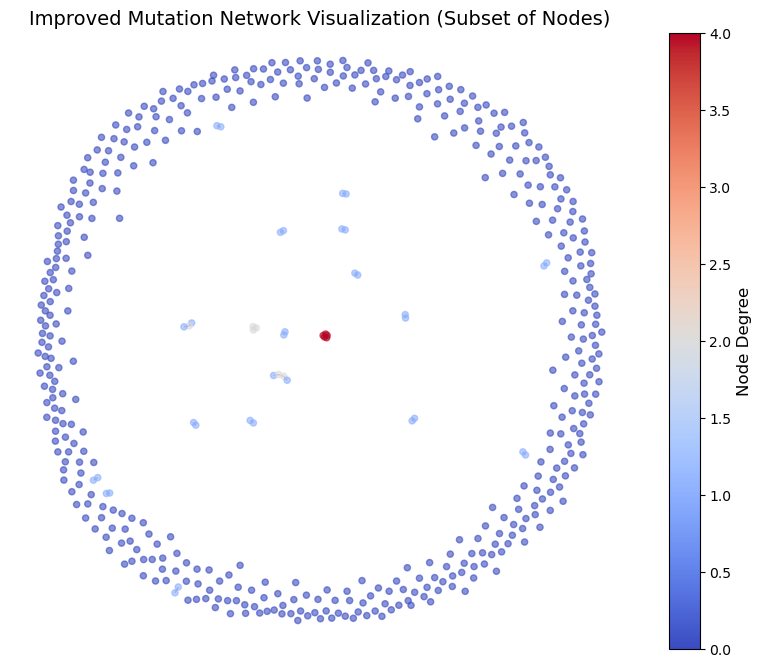

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Select a smaller subset of nodes for visualization
num_nodes_to_visualize = 500  
subgraph_nodes = list(G.nodes)[:num_nodes_to_visualize]
subgraph = G.subgraph(subgraph_nodes)

# Compute node degrees for coloring
degrees = dict(subgraph.degree())
node_color = list(degrees.values())  # Convert to list for visualization

# Normalize color range
norm = mcolors.Normalize(vmin=min(node_color), vmax=max(node_color))
cmap = cm.get_cmap("coolwarm")

# Draw the subgraph
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Compute node positions
pos = nx.spring_layout(subgraph, seed=42)  # Force-directed layout

# Draw the network with node colors based on degrees
nx.draw(
    subgraph, pos, node_size=20, 
    node_color=node_color, cmap=cmap, 
    edge_color="gray", alpha=0.6, with_labels=False, ax=ax
)

# Add a colorbar manually
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("Node Degree", fontsize=12)

# Title
plt.title("Improved Mutation Network Visualization (Subset of Nodes)", fontsize=14)
plt.show()


In [8]:
import torch
from torch_geometric.data import Data

# drop patient column from node features
node_features_df = node_features_df.drop(columns=['Patient'])
# Convert boolean columns to float32
node_features_df = node_features_df.astype(float)
x = torch.tensor(node_features_df.values, dtype=torch.float32)

# Convert edges
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create PyTorch Geometric Data object
data_graph = Data(
    x=x, 
    edge_index=edge_index,
    edge_weight=edge_weight
)

print(f'Graph: {data_graph}')
print(f'Nodes: {data_graph.num_nodes}, Edges: {data_graph.num_edges}')

# save the graph to a file
torch.save(data_graph, '../data/msk_2024_mutation_graph.pt')


Graph: Data(x=[179552, 46], edge_index=[2, 3471304], edge_weight=[3471304])
Nodes: 179552, Edges: 3471304


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, BatchNorm

class MutationEmbeddingGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, embedding_dim=64, dropout=0.3):
        super().__init__()

        # GraphSAGE Layers
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.bn1 = BatchNorm(hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, embedding_dim)
        self.bn2 = BatchNorm(embedding_dim)
        
        # Fully Connected Layers for output
        self.fc1 = nn.Linear(embedding_dim, embedding_dim // 2)
        self.fc2 = nn.Linear(embedding_dim // 2, 1)  # Final risk score

        self.dropout = nn.Dropout(dropout)

    def forward(self, x, edge_index, edge_weight):
        # First GraphSAGE layer
        x = self.conv1(x, edge_index, edge_weight)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)

        # Second GraphSAGE layer
        x = self.conv2(x, edge_index, edge_weight)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)

        # Fully Connected Layers for Risk Score
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x.squeeze()  # Returns node embeddings or risk scores


In [10]:
from torch_geometric.loader import NeighborLoader

# Mini-batching parameters
batch_size = 2048  # Tune based on GPU memory
num_neighbors = [15, 10]  # Sample 15 and 10 neighbors per layer

train_loader = NeighborLoader(
    data_graph, 
    num_neighbors=num_neighbors, 
    batch_size=batch_size, 
    shuffle=True
)



/home/lyce/miniconda3/envs/dlg/lib/python3.11/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [ ]:
import torch.optim as optim

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MutationEmbeddingGNN(input_dim=data_graph.x.shape[1], hidden_dim=128, embedding_dim=64).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-4)  # AdamW works better for large graphs
loss_fn = nn.MSELoss()  # Replace with Cox Loss if survival data is available

# Training Loop with Early Stopping
epochs = 75
best_loss = float("inf")
patience = 7  # Stop training if no improvement for 3 epochs
counter = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    for batch in train_loader:
        optimizer.zero_grad()
        
        batch_x = batch.x.to(device)
        batch_edge_index = batch.edge_index.to(device)
        batch_edge_weight = batch.edge_weight.to(device)
        
        # Forward pass
        risk_scores = model(batch_x, batch_edge_index, batch_edge_weight)
        
        # Use real survival times (replace with actual survival labels)
        survival_time = torch.rand(batch_x.shape[0]).to(device) * 100  
        loss = loss_fn(risk_scores, survival_time)

        # Backpropagation
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Early stopping
    if avg_loss < best_loss:
        best_loss = avg_loss
        counter = 0
        torch.save(model.state_dict(), "best_mutation_gnn.pth")  # Save best model
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

print("Training complete!")


ImportError: 'NeighborSampler' requires either 'pyg-lib' or 'torch-sparse'

: 

In [ ]:
# Load best model
model.load_state_dict(torch.load("best_mutation_gnn.pth"))
model.eval()

# Generate final mutation embeddings
with torch.no_grad():
    mutation_embeddings = model(data_graph.x.to(device), data_graph.edge_index.to(device), data_graph.edge_weight.to(device))

# Convert to NumPy and Save
mutation_embeddings_np = mutation_embeddings.cpu().numpy()
np.save("mutation_embeddings.npy", mutation_embeddings_np)

print("Embeddings saved successfully!")
